In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

Narrative:

You are given a data set 'IEA_Electricity.csv' that contains electricity data from many countries affiliated with the International Energy Agency. Locate the Australia electricity ‘Final Consumption (Calculated)’ in the Balance column. This consumption is in terms of number of gigawatts-hour per month from Jan 2010 to Sep 2022.

Requirements:

Perform time series analyses on this Australian consumption pattern. Let this consumption time series be represented by C(t) where t is the monthly time index. (Hint: You can use the following in ipynb to invert the order of the series Cons. Or you can first use Excel to do some data manipulation before calling into Python.)

C=Cons[::-1]

C=C.reset_index(drop=True)

Make sure you employ the correct sampling period as required.

Then answer the following 5 Questions.

In [3]:
# Dataset 'Airline-passengers.csv'
data = pd.read_csv('IEA_Electricity.csv') 
data1 = data[data['Country']=='Australia']
data2 = data1[data1['Product']=="Electricity"]
data3 = data2[data2["Balance"]=='Final Consumption (Calculated)']

dataframe = pd.DataFrame(data3, columns=['Time', 'Value'])

#change datatype of Time
date_format = '%b-%y'
dataframe['Time'] = pd.to_datetime(dataframe['Time'], format=date_format)

dataframe = dataframe.set_index('Time')
dataframe = dataframe[::-1]
dataframe

,Value
Time,
2010-01-01,19317.9310
2010-02-01,17819.7690
2010-03-01,18092.7870
2010-04-01,16816.0050
2010-05-01,18417.9490
...,...
2022-05-01,20810.8818
2022-06-01,21627.0300
2022-07-01,22579.3576


# Q1 Show the sample autocorrelation function and the sample partial autocorrelation function up to 40 lags for C(t). Indicate which one of (A), (B), (C), (D) is the correct set of the sample functions.



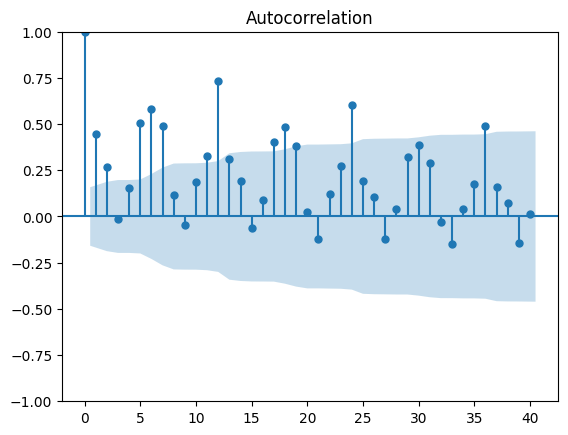

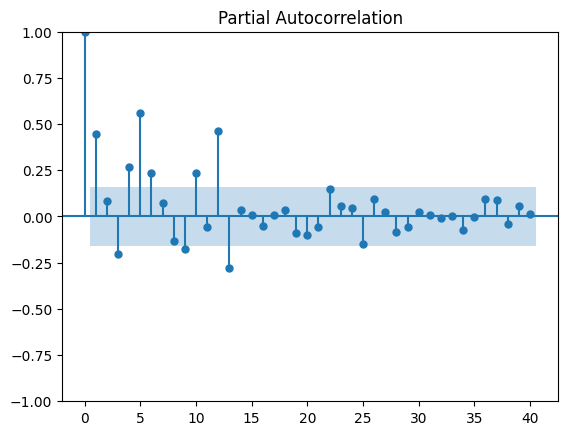

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dataframe['Value'], lags=40);
plot_pacf(dataframe['Value'], method='ywm', lags=40);

# Q2 Suppose you notice a seasonal spike every 12 months. Employ seasonal differencing and estimate the time series model of C(t) with ARIMA (1,0,1) x (0,1,0)_12. Use sm.tsa.statespace.SARIMAX with a constant. What are the estimates of the intercept, the AR coefficient and the MA coefficient? Select the closest numbers.

# Q3 What is the Jarque-Bera test statistic of the fitted residuals? Can you reject normal distribution at the one-tailed 1% significance level?

In [5]:
### Apply (1,0,1) x (0,1,0)_12 
value12 = dataframe['Value'] - dataframe['Value'].shift(12)
value12 = value12.dropna()

import statsmodels.api as sm
model0 = sm.tsa.statespace.SARIMAX(value12, trend = 'c',order=(1,0,1))  
model0_fit=model0.fit(disp=0)
print(model0_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  141
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1122.882
Date:                Thu, 14 Mar 2024   AIC                           2253.764
Time:                        14:23:05   BIC                           2265.559
Sample:                    01-01-2011   HQIC                          2258.557
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    113.9905     56.836      2.006      0.045       2.594     225.387
ar.L1          0.5685      0.180      3.152      0.002       0.215       0.922
ma.L1         -0.2361      0.215     -1.099      0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Q4 Construct a prediction of C(t) using model.fit().predict() and plot the actual versus the predicted C(t) for every month starting from Feb 2011 till Sep 2022. Indicate which of (A), (B), (C), (D) is the correct plot?

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96426D+00    |proj g|=  2.45862D-02

At iterate    5    f=  7.96371D+00    |proj g|=  2.74845D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   9.626D-05   7.964D+00
  F =   7.9637023952152051     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


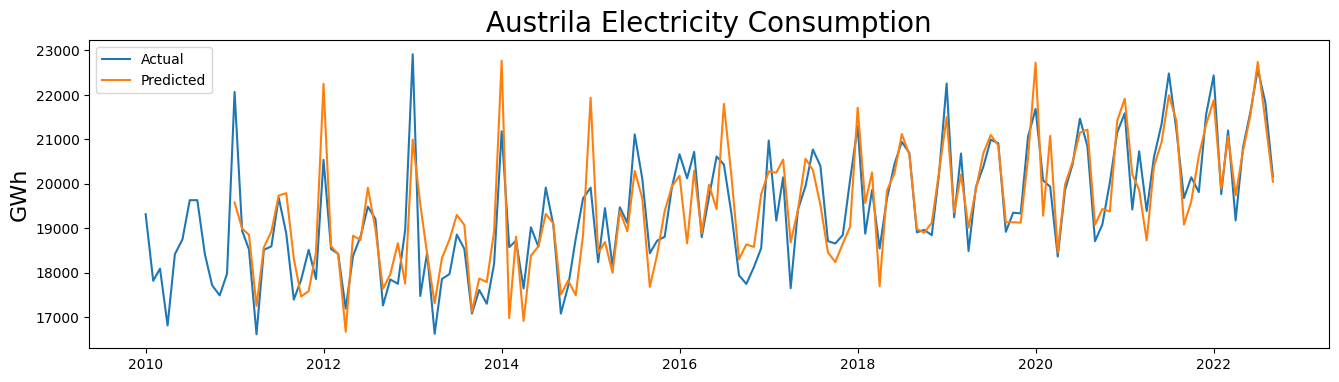

In [9]:
predictions1 = model0.fit().predict()  ### Note: 'predict' is just fitting here
predict1=predictions1 + dataframe['Value'].shift(12)
## convert ln back to raw levels
Epredict1=predict1

plt.figure(figsize=(16,4))
plt.plot(dataframe['Value'], label="Actual")
plt.plot(Epredict1, label="Predicted")
plt.title('Austrila Electricity Consumption', fontsize=20)
plt.ylabel("GWh", fontsize=16)
plt.legend()
plt.show()

# Q5 What are the minimum and maximum percentage error in the prediction in Question 4? (Note percentage error can be positive or negative depending on whether the predicted value is larger or smaller than the actual.)

In [12]:
err1=predict1-dataframe['Value'].dropna()
error_percentage = err1/dataframe['Value']
max(error_percentage.dropna()),min(error_percentage.dropna())

(0.11828284191848452, -0.1125841790511936)